The Avengers are a well-known and widely-loved team of superheroes in the Marvel universe that were originally introduced in the 1960's comic book series. The recent Disney movies re-popularized them, as part of the new Marvel Cinematic Universe.

Because the writers killed off and revived many of the superheroes, the team at FiveThirtyEight was curious to explore data from the Marvel Wikia site further. To learn how they collected their data, which is available in their GitHub repository, read the write-up they published on the FiveThirtyEight website.

While the FiveThirtyEight team did a wonderful job acquiring the data, it still has some inconsistencies. we must clean up their data set so it can be more useful for analysis in pandas. Let's read it into pandas as a dataframe and preview the first five rows to get a better sense of it.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from mpl_toolkits.basemap import Basemap
%matplotlib inline


avengers = pd.read_csv('avengers.csv')
avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


Because the data came from a crowdsourced community site, it could contain errors. If we plot a histogram of the values in the Year column, which describes the year Marvel introduced each Avenger, we'll immediately notice some oddities. For example, there are quite a few Avengers who look like they were introduced in 1900, which we know is a little fishy -- the Avengers weren't introduced in the comic series until the 1960's!

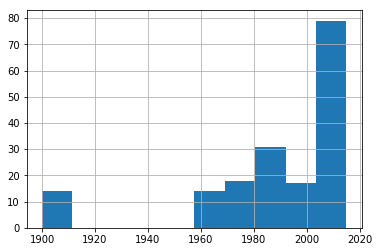

In [55]:
avengers['Year'].hist()

We only want to keep the Avengers who were introduced after 1960

In [56]:
true_avengers = avengers[avengers['Year']>1959]

We're interested in the total number of deaths each character experienced, so we'd like to have a single field containing that information. Right now, there are five fields (Death1 to Death5), each of which contains a binary value representing whether a superhero experienced that death or not. For example, a superhero could experience Death1, then Death2, and so on until the writers decided not to bring the character back to life.

We'd like to combine that information in a single field so we can perform numerical analysis on it more easily.

In [57]:
 true_avengers[['Death1','Death2', 'Death3', 'Death4', 'Death5']].head(10)

,Death1,Death2,Death3,Death4,Death5
0,YES,NaN,NaN,NaN,NaN
1,YES,NaN,NaN,NaN,NaN
2,YES,NaN,NaN,NaN,NaN
3,YES,NaN,NaN,NaN,NaN
4,YES,YES,NaN,NaN,NaN
5,NO,NaN,NaN,NaN,NaN
6,YES,NaN,NaN,NaN,NaN
7,YES,YES,NaN,NaN,NaN
8,YES,NaN,NaN,NaN,NaN
9,YES,NaN,NaN,NaN,NaN


In [58]:
true_avengers_copy = true_avengers.copy()

for x in range(1, 6):
    true_avengers_copy = true_avengers_copy.replace({'Death' + str(x): {'YES': True, 'NO': False}})
    

tmpdf.head(5)

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [59]:
true_avengers['Deaths'] = true_avengers_copy[['Death1','Death2', 'Death3', 'Death4', 'Death5']].sum(axis=1)  

true_avengers[['Death1','Death2', 'Death3', 'Death4', 'Death5', 'Deaths']].head(10)

/Users/rogelio/.pyenv/versions/3.6.1/envs/dataquest/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Death1,Death2,Death3,Death4,Death5,Deaths
0,YES,NaN,NaN,NaN,NaN,1.0
1,YES,NaN,NaN,NaN,NaN,1.0
2,YES,NaN,NaN,NaN,NaN,1.0
3,YES,NaN,NaN,NaN,NaN,1.0
4,YES,YES,NaN,NaN,NaN,2.0
5,NO,NaN,NaN,NaN,NaN,0.0
6,YES,NaN,NaN,NaN,NaN,1.0
7,YES,YES,NaN,NaN,NaN,2.0
8,YES,NaN,NaN,NaN,NaN,1.0
9,YES,NaN,NaN,NaN,NaN,1.0


In [66]:
substraction = 2015 - true_avengers['Year']
matches = true_avengers['Years since joining'] == substraction
matches[matches == True].size


159